In [ ]:
import pandas as pd
df_fake = pd.read_csv("https://github.com/abhishekbansal815/abhishek_repo/raw/master/Complete%20dataset/Fake.csv")
df_fake.loc[:,'fake'] = '1'
df_true = pd.read_csv("https://github.com/abhishekbansal815/abhishek_repo/raw/master/Complete%20dataset/True.csv")
df_true.loc[:,'fake'] = '0'
df = pd.concat ([df_true,df_fake])
df=df.reset_index(drop=True)
df=df.sample(frac=1)
df.head()

,title,text,subject,date,fake
32353,DEAR MR. PRESIDENT…When We Said “Lock Her Up” ...,"When he was running for president, Donald Trum...",politics,"May 9, 2017",1
16588,Morocco's king fires ministers over slow progr...,RABAT (Reuters) - Morocco s king dismissed sev...,worldnews,"October 24, 2017",0
37498,EX-CIA CHIEF DROPS A TRUTH BOMB: Trump Never P...,EX-CIA Chief John Brennan testified today befo...,Government News,"May 23, 2017",1
39491,WATCH KARMA IN ACTION: CNN GETS HIT With Tear ...,The timing couldn t have been better. Just as ...,left-news,"Aug 23, 2017",1
23732,Dem Congressman HUMILIATES Trump With One Glo...,"It s one thing to call a person stupid, it s a...",News,"March 3, 2017",1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer



X = df['title']
y = df['fake']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

counter = CountVectorizer(stop_words='english')

In [ ]:
X_train_v = counter.fit_transform(X_train)
X_test_v = counter.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_v, y_train)
y_pred = clf.predict(X_test_v)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9512


In [ ]:
nuevo = [' '.join(['video' 'breaking' 'hillary' 'watch' 'gop' 'just' 'tweets' 'america'
 'black' 'white' 'muslim' 'gets' 'news' 'donald' 'obama' 'donald trump'
 'media' 'anti' 'republicans' 'trump'])]

In [ ]:
nuevo = [' '.join(['eu' 'china' 'says' 'white house' 'north' 'senate' 'house' 'tax' 'korea'
 'court' 'iran' 'deal' 'russia' 'vote' 'north korea' 'state' 'election'
 'police' 'calls' 'republican'])]

In [ ]:
nuevo_t = counter.transform(nuevo)
clf.predict(nuevo_t)

array(['0'], dtype=object)

# Frecuencias

In [ ]:
import numpy as np

In [ ]:
feature_names = np.array(counter.get_feature_names_out())
sorted_coef_index = clf.coef_[0].argsort()
print('Coefs Fake : \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))
print()
print('Coefs True :\n{}\n'.format(feature_names[sorted_coef_index[:20]]))


Coefs Fake : 
['video' 'breaking' 'gop' 'watch' 'just' 'hillary' 'racist' 'boiler'
 'bernie' 'illegals' 'dem' 'isis' 'james' 'real' 'ck' 'bundy' 'bombshell'
 'busted' 'details' 'shocking']

Coefs True :
['factbox' 'urges' 'says' 'exclusive' 'myanmar' 'rohingya' 'seek' 'seeks'
 'zimbabwe' 'kremlin' 'south' 'spokesman' 'urge' 'ex' 'turkey' 'bid'
 'egypt' 'sanctions' 'talks' 'pakistan']



In [ ]:

incorrect_indices = (y_pred != y_test)


In [ ]:
y_test[incorrect_indices].index

Index([30160, 25157,  7610,  3900, 11213, 40857, 38222,  8982, 29374, 25400,
       ...
       30289, 44390,  6421, 19645, 27747, 16336,  5997, 28790, 24332,  3386],
      dtype='int64', length=438)

In [ ]:
i=30
j=y_test[incorrect_indices].index[i]
df.loc[j].title,df.loc[j].fake

(' Trump Threw Himself A Victory Party And Barely Anyone Showed Up', '1')

In [ ]:
nuevo_t = counter.transform([df.loc[j].title])
clf.predict(nuevo_t)

array(['0'], dtype=object)

In [ ]:
y_test.value_counts()

,count
fake,
1,4693
0,4287


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.LinearExplainer(clf, X_train_v)
shap_values = explainer.shap_values(X_test_v)
X_test_array = X_test_v.toarray() # we need to pass a dense version for the plotting functions

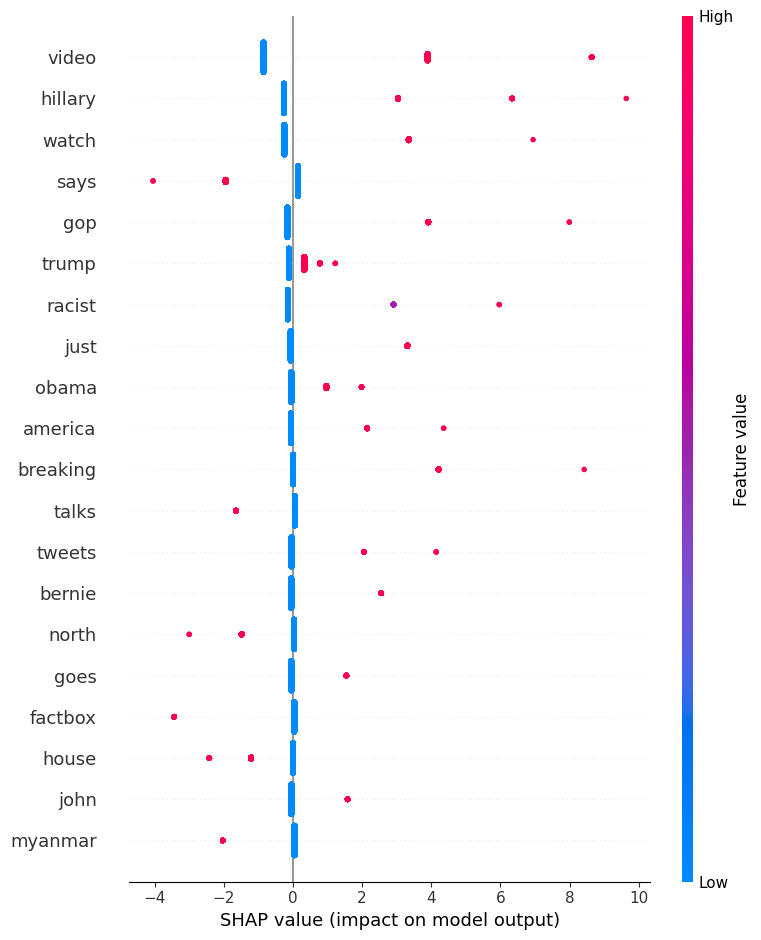

In [ ]:
shap.summary_plot(shap_values, X_test_array, feature_names=counter.get_feature_names_out())


In [ ]:
shap.initjs()
ind = 1
print(X_test.iloc[ind])
print('Fake: ',y_test.iloc[ind])
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=counter.get_feature_names_out()
)

CAN YOU HEAR HIM NOW? President Trump Doubles Down: Condemns ‘Evil’ KKK, White Supremacists, Neo-Nazis [Video and Transcript]
Fake:  1


# Test en otro dataset

In [ ]:
df_test=pd.read_csv('https://github.com/KaiDMML/FakeNewsNet/raw/master/dataset/politifact_fake.csv')

In [ ]:
df_test.title.iloc[0]

'BREAKING: First NFL Team Declares Bankruptcy Over Kneeling Thugs'

In [ ]:
X_test2=counter.transform(df_test.title)

In [ ]:
y_pred2=clf.predict(X_test2)

In [ ]:
sum(y_pred2.astype(int))/len(y_pred2)

0.6458333333333334